In [1]:
import torch.nn as nn

In [2]:
import torch

In [3]:
from RPN import Rpn
import matplotlib.pyplot as plt
import cv2
import json
import os
import numpy as np

In [4]:
%matplotlib inline

In [5]:
boxes_list = json.load(open('image/Annotation/RGB/bbox_list.txt', 'r'))
image_path = 'D:\\PythonPro\\Mask_RCNN-ysk\\image\\RGB\\'
box_path = 'D:\\PythonPro\\Mask_RCNN-ysk\\image\\Annotation\\RGB\\'

In [9]:
boxes_list['20171215162835053']

[[3, 555, 10, 673, 187],
 [7, 609, 360, 669, 462],
 [7, 425, 350, 509, 503],
 [6, 254, 442, 356, 511],
 [5, 509, 383, 587, 492]]

In [7]:
type(boxes_list['20171215162835053'])

list

In [22]:
a = cv2.imread(image_path + '20171215162835053.bmp')

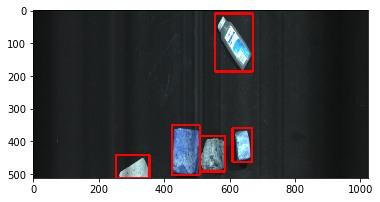

In [23]:
boxes = boxes_list['20171215162835053']
for box in boxes:
    cv2.rectangle(a, (box[1], box[2]), (box[3], box[4]), (255,0,0), 5)
plt.imshow(a)

In [38]:
new_boxes = []
for box in boxes:
    for i in [1, 3]:
        if box[i] < 256:
            box[i] = 0
        elif box[i] < 768:
            box[i] -= 256
        else:
            box[i] = 767
    if box[1] != box[3]:
        new_boxes.append(box)

In [39]:
new_boxes

[]

In [26]:
b = cv2.imread(image_path + '20171215162835053.bmp')
b = b[:, 256:768, :]

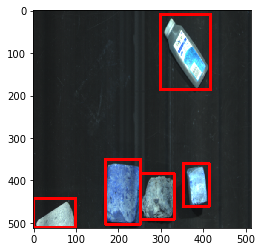

In [27]:
for box in new_boxes:
    cv2.rectangle(b, (box[1], box[2]), (box[3], box[4]), (255,0,0), 5)
plt.imshow(b)

In [20]:
file_list[2]

'20171215162835053.bmp'

In [4]:
class DataSet:
    def __init__(self, file_box_dict, image_path, info_path):
        # info: [file1_info, file2_info, file3_info, ...]
        # file_info: {'name','path','bbox'}
        self.info = []
        self.image_id = 0
        self.box_info = file_box_dict
        self.image_path = image_path
        self.info_path = info_path

    def add_image(self, name, path):
        file_info = {'name': name}
        self.info.append(file_info)
        self.image_id += 1

    def get_boxes(self, image_id):
        file_info = self.info[image_id]
        boxes = np.copy(self.box_info[file_info['name'][:-4]])
        print(boxes)
        new_boxes = []
        for box in boxes:
            for i in [1, 3]:
                if box[i] < 256:
                    box[i] = 0
                elif box[i] < 768:
                    box[i] -= 256
                else:
                    box[i] = 767
            if box[1] != box[3]:
                new_boxes.append(box)
        return new_boxes
    
    def draw(self, image_id):
        image = self.get_image(image_id)
        boxes = self.get_boxes(image_id)
        for box in boxes:
            cv2.rectangle(image, (box[1], box[2]), (box[3], box[4]), (255,0,0), 5)
        plt.imshow(image)
        

    def get_image(self, image_id):
        file_info = self.info[image_id]
        image = cv2.imread(image_path + file_info['name'])
        return image[:, 256:768, :]

    def get_mask(self, id):
        pass

In [5]:
data_set = DataSet(boxes_list, image_path, box_path)

In [6]:
file_list = []
for file in os.listdir('./image/RGB/'):
            if file.endswith('.bmp'):
                file_list.append(file)

In [7]:
for file in file_list:
    data_set.add_image(file, image_path)

[[  6 262   0 365  93]
 [  5 433   0 612 210]
 [  4 682 119 783 305]
 [  5 434 377 561 497]]


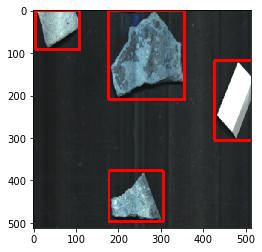

In [14]:
data_set.draw(3)

In [10]:
data_set.get_boxes(2)

[[  3 555  10 673 187]
 [  7 609 360 669 462]
 [  7 425 350 509 503]
 [  6 254 442 356 511]
 [  5 509 383 587 492]]


[array([  3, 299,  10, 417, 187]),
 array([  7, 353, 360, 413, 462]),
 array([  7, 169, 350, 253, 503]),
 array([  6,   0, 442, 100, 511]),
 array([  5, 253, 383, 331, 492])]

In [62]:
file_list[2]

'20171215162835053.bmp'

In [5]:
feature_map = torch.autograd.Variable(torch.randn(2,256,4,4))

In [6]:
re = rpn(feature_map)

In [16]:
boxes = [[1,34,56,256,67], [3,555,34,999,454]]

In [17]:
new_boxes = []
for box in boxes:
    for i in [1, 3]:
        if box[i] < 256:
            box[i] = 0
        elif box[i] < 768:
            box[i] -= 256
        else:
            box[i] = 767
    if box[1] != box[3]:
        new_boxes.append(box)

In [20]:
555-256

299

In [11]:
import os

In [12]:
a = 'd:\\erwr'
b = 'sdfs.txt'
print(os.path.join(a, b))

d:\erwr\sdfs.txt
